In [20]:
# Import log json file and view Gantt chart of the log
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [21]:

def graphResults(logs, labels, ref, title, subtitle):
    '''Graph the results'''

    i=0
    for log in logs:
        if labels:
            plt.plot(log, label=labels[i])
        else:
            plt.plot(log)
        i+=1
    
    # Horizontal line for reference
    plt.axhline(y=ref, color='red', linestyle='dashed')
    
    # Add labels
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(subtitle)
    plt.suptitle(title)
    # Add legend
    plt.legend()
    #plt.show()

    # Save the figure
    timestamp = time()
    plt.savefig(title+str(timestamp)+'.png')

def getDataGantt(logs, title, iters=50):
    n = len(logs)
    #tt, s, x = getCycleTime(t, l, L, W)
    dflist = []

    j = 0
    for log in logs: # Node logs
        i = 0
        for iterlog in log[1:]: # Operations
            if i > iters:
                break
            start = iterlog['start']
            stop = iterlog['end']
            if j==0 and i==0:
                offset = start
            start = start - offset
            stop = stop - offset
            #start = s[i,j]
            #stop = start + t[j]
            dflist.append(dict(Task="Iter %s" % i, Start=start, Finish=stop, Resource="Node %s" % j))
            i += 1
        j += 1
    df = pd.DataFrame(dflist)
    df['delta'] = df['Finish'] - df['Start']
    # Export df to csv
    #df.to_csv(title+'.csv')

    fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Task")
    fig.update_yaxes(autorange="reversed") 

    fig.layout.xaxis.type = 'linear'
    for d in fig.data:
        filt = df['Task'] == d.name
        d.x = df[filt]['delta'].tolist()

    fig.update_layout(title_text=title)
    return fig


In [22]:
# Import log file logs_lambert1710*.json
LW_titles = ['full', 'MT', 'block2', 'SLEM', 'Ryu']
logs = []
for title in LW_titles:
    log = []
    for node in range(16):
        logname = 'logs_wta'+str(node)+'_'+title+'.json'
        with open(logname) as f:
            data = json.load(f)
        log.append(data)
    logs.append(log)

# Data is a list of lists with the following structure:
# data = [[node1_1, node1_2, ... ],[node2_1, node2_2, ...],...]
# where log1 is a dictionary with the following structure:
# log1 = {'start': 0, 'end': 0, 'value': 0, 'time': 0}



In [23]:
logs[0][0]

[{'start': 1711496514.9781435,
  'end': 1711496524.1663783,
  'time': 9.188234806060791,
  'value': 224.0449327165246},
 {'start': 1711496524.201101,
  'end': 1711496524.2013776,
  'time': 0.0002765655517578125,
  'value': 190.4344331444544},
 {'start': 1711496524.2229974,
  'end': 1711496524.2232614,
  'time': 0.0002639293670654297,
  'value': 151.1992911465859},
 {'start': 1711496524.2440743,
  'end': 1711496524.2443306,
  'time': 0.0002562999725341797,
  'value': 123.57074592537282},
 {'start': 1711496524.2517817,
  'end': 1711496524.252048,
  'time': 0.0002663135528564453,
  'value': 105.10068711672115},
 {'start': 1711496524.2694898,
  'end': 1711496524.2697513,
  'time': 0.00026154518127441406,
  'value': 92.1088980790677},
 {'start': 1711496524.2913685,
  'end': 1711496524.2915947,
  'time': 0.0002262592315673828,
  'value': 83.76294829386859},
 {'start': 1711496524.3134155,
  'end': 1711496524.3136456,
  'time': 0.0002300739288330078,
  'value': 78.88422382601897},
 {'start': 1

In [24]:
fig = getDataGantt(logs[0], "Parallel WTA Full", iters=20)
fig.show()

In [25]:
fig = getDataGantt(logs[1], "Parallel WTA MT")
fig.show()

In [26]:
# Block
fig = getDataGantt(logs[2], "Parallel WTA Block")
fig.show()


In [27]:
# SLEM
fig = getDataGantt(logs[3], "Parallel WTA SLEM")
fig.show()

In [28]:
# Ryu
fig = getDataGantt(logs[4], "Parallel WTA Ryu")
fig.show()

In [29]:
# Plot the value entry in last log for each of the three methods
# Against the time delta 
# Get the last value of each log
ref=56.45764131667768
values = []
time_deltas = []
for log in logs:
    start = log[0][1]['start']
    values.append([e['value'] for e in log[0][1:]])
    time_deltas.append([e['end']-start for e in log[0][1:]])


In [30]:
start = logs[0][0][1]['start']
for i in range(1,50):
    e = logs[0][0][i]
    print(e['value'], e['end']-start)

190.4344331444544 0.0002765655517578125
151.1992911465859 0.02216029167175293
123.57074592537282 0.04322957992553711
105.10068711672115 0.050946950912475586
92.1088980790677 0.0686502456665039
83.76294829386859 0.09049367904663086
78.88422382601897 0.11254453659057617
75.74673661587606 0.13458824157714844
73.37203302604478 0.18240761756896973
71.39009979316322 0.20830750465393066
69.64422904129577 0.23438215255737305
67.99777341939661 0.2593708038330078
66.45751840772749 0.27950382232666016
65.15997079372107 0.3054690361022949
64.15388986971107 0.3354675769805908
63.26466364836918 0.36160707473754883
62.47259851678807 0.3874659538269043
61.79022853611298 0.42145729064941406
61.22749215373574 0.449831485748291
60.73990072515806 0.4700288772583008
60.37186517015231 0.4841954708099365
60.056362956230636 0.5023117065429688
59.79799647899975 0.5171706676483154
59.548191279040225 0.5301775932312012
59.31149243164456 0.5561797618865967
59.10148381141053 0.5820727348327637
58.90072683661851 0.

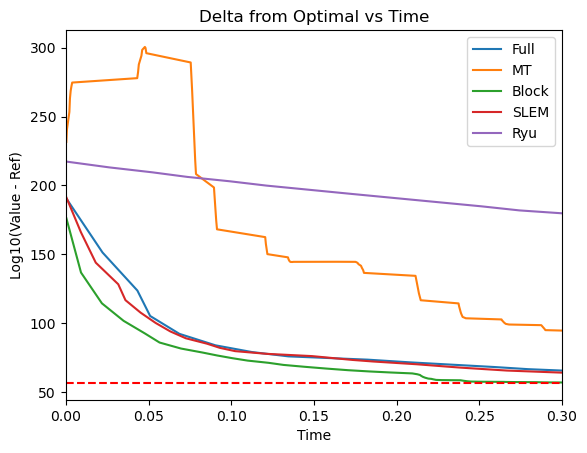

In [31]:
ref=56.45764131667768
plt.plot(time_deltas[0], values[0], label='Full')
plt.plot(time_deltas[1], values[1], label='MT')
plt.plot(time_deltas[2], values[2], label='Block')
plt.plot(time_deltas[3], values[3], label='SLEM')
plt.plot(time_deltas[4], values[4], label='Ryu')
plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
plt.xlim(0, 0.3)
plt.title('Delta from Optimal vs Time')
plt.legend()

plt.show()

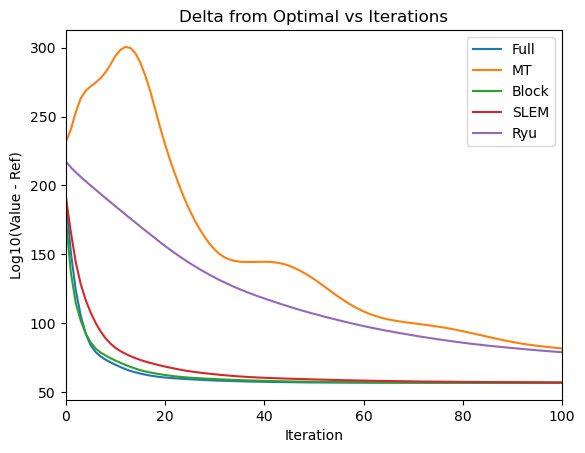

In [32]:
# Plot vs Iterations
plt.plot(values[0], label='Full')
plt.plot(values[1], label='MT')
plt.plot(values[2], label='Block')
plt.plot(values[3], label='SLEM')
plt.plot(values[4], label='Ryu')
#plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Iteration')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
plt.xlim(0, 100)
plt.title('Delta from Optimal vs Iterations')
plt.legend()

plt.show()

In [33]:
# Find the time taken for each node and its standard deviation
# Create a dataframe with the times
# With a column for each node
times = pd.DataFrame()
for i, nodelog in enumerate(logs[0]):
    times['Node'+str(i)] = [e['end']-e['start'] for e in nodelog[1:]]

times.describe()
    
            


,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.000379,0.000064,0.000038,0.000045,0.000041,0.000041,0.000054,0.000044,0.000040,0.000042,0.000042,0.000043,0.000040,0.000041,0.000044,0.000039
std,0.001384,0.000157,0.000016,0.000085,0.000015,0.000017,0.000413,0.000021,0.000041,0.000125,0.000076,0.000071,0.000017,0.000017,0.000018,0.000051
min,0.000177,0.000018,0.000017,0.000019,0.000017,0.000018,0.000018,0.000018,0.000018,0.000017,0.000020,0.000018,0.000018,0.000018,0.000018,0.000019
25%,0.000221,0.000040,0.000025,0.000029,0.000031,0.000029,0.000030,0.000028,0.000028,0.000024,0.000027,0.000025,0.000026,0.000025,0.000029,0.000024
50%,0.000237,0.000045,0.000033,0.000037,0.000038,0.000037,0.000040,0.000040,0.000035,0.000034,0.000037,0.000039,0.000036,0.000041,0.000044,0.000031
75%,0.000255,0.000056,0.000046,0.000050,0.000047,0.000049,0.000049,0.000054,0.000045,0.000046,0.000048,0.000051,0.000049,0.000049,0.000053,0.000046
max,0.018764,0.003230,0.000120,0.002126,0.000137,0.000144,0.013075,0.000208,0.001011,0.003947,0.002407,0.002206,0.000151,0.000185,0.000144,0.001347


In [34]:
# Find the time for the communication between nodes
# Using MT as an example

# Create a dataframe with the times
# With a column for each node
commtimes = pd.DataFrame()
for i in range(1,10):
    # Find the difference between start on node i and end on node i-1
    commtimes['Node'+str(i)] = [logs[1][i][j]['start']-logs[1][i-1][j]['end'] for j in range(1,1000)]

commtimes.describe()

,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.002054,0.001722,0.001736,0.001399,0.001016,0.001068,0.001085,0.000919,0.000549
std,0.005646,0.004735,0.004813,0.004388,0.003354,0.003445,0.003473,0.003228,0.002397
min,0.000057,0.000017,0.000018,0.000016,0.000017,0.000017,0.000017,0.000015,0.000016
25%,0.000072,0.000020,0.000021,0.000020,0.000020,0.000021,0.000021,0.000022,0.000028
50%,0.000086,0.000029,0.000025,0.000027,0.000029,0.000033,0.000033,0.000052,0.000059
75%,0.000125,0.000050,0.000059,0.000059,0.000059,0.000071,0.000083,0.000094,0.000094
max,0.039797,0.040195,0.040742,0.041295,0.019898,0.021498,0.022109,0.024536,0.024823


In [35]:
# # Plot a histogram of the communication times for each node 
# # as subplots
# fig, axs = plt.subplots(3,3)
# binwidth = 1e-6
# for i in range(1,10):
#     ax = axs[(i-1)//3, (i-1)%3]
#     # Use common bin size
#     dat = commtimes['Node'+str(i)]
#     ax.hist(dat, bins=np.arange(min(dat), max(dat) + binwidth, binwidth))

#     #ax.hist(commtimes['Node'+str(i)], bins=20)
#     # Get common x-axis
#     ax.set_xlim(0, 5e-5)
#     ax.set_title('Node'+str(i))
# plt.show()